# **Final Project Task 1 - Census Data Preprocess**

Requirements

- Target variable specification:
    - The target variable for this project is hours-per-week. 
    - Ensure all preprocessing steps are designed to support regression analysis on this target variable.
- Encode data  **3p**
- Handle missing values if any **1p**
- Correct errors, inconsistencies, remove duplicates if any **1p**
- Outlier detection and treatment if any **1p**
- Normalization / Standardization if necesarry **1p**
- Feature engineering **3p**
- Train test split, save it.
- Others?


Deliverable:

- Notebook code with no errors.
- Preprocessed data as csv.

In [154]:
import pandas as pd

In [155]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer


train_test_split - pentru impartirea datelor in setul de antrenare, respectiv, setul de test;
pentru coloanele numerice va fi utilizat StandardScaler; iar pentru cele categorice, OneHotEncoder; FunctionsTransformer va fi utilizat pentru transformarile specifice, precum logaritmarea in cazul variabilelor foarte asimetrice, daca este cazul;
simpleimputer - pentru tratarea valorilor lipsa din setul de date; 

#Inspectarea rapida a datelor: dimensiunile setului de date (shape), tipurile de date (info) si a valorilor lipsa:

In [157]:
print("Shape:", data.shape)
data.info()

Shape: (32561, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

-> Nu avem date lipsa in coloanele setului de date.

#In continuare, vor fi curatate datele prin eliminarea inconsistentelor, a duplicatelor si prin normalizarea valorilor:

In [159]:
data.duplicated().sum()

np.int64(24)

In [160]:
data = data.drop_duplicates()

#Au fost identificate valori duplicate (24 de randuri) si au fost eliminate, intrucat pot afecta negativ performanta modelului si altera distributia datelor.

In [161]:
data.replace('?', np.nan, inplace=True)
data.isna().sum()

missing_values = data.isna().sum()
missing_values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [162]:
#Valorile lipsa vor fi tratate prin imputarea modului:

columns_with_missing = ['workclass', 'occupation', 'native-country']
for col in columns_with_missing:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

C:\Users\teo\AppData\Local\Temp\ipykernel_13700\1310935089.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)


In [163]:
categorical_cols = data.select_dtypes(include="object").columns
for col in categorical_cols:
    data[col] = data[col].str.strip()

#Am eliminat spatiile extra din string-uri

data[categorical_cols].nunique()

workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

#Ulterior, au fost curatate datelor categorice de tip string pentru eliminarea spatiilor inutile.

#Encodarea variabilelor categorice:

In [164]:
#1 Encodarea sexului drept variabila binara (0,1):
data['sex_encodat'] = data['sex'].map({'Female': 0, 'Male': 1})

#2 Encodarea venitului:
data['income_encodat'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [165]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex_encodat,income_encodat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0


#Feature engineering - crearea unei nou variabile care imparte intervalele de varsta in 3 categorii:

In [166]:
data['age_group'] = pd.cut(
    data['age'],
    bins=[0, 30, 60, 100],
    labels=['young', 'adult', 'senior']
)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex_encodat,income_encodat,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0,adult
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0,adult
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,adult
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0,adult
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,young


#One Hot encoding pentru variabilele categorice:

In [167]:
cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'age_group']
data = pd.get_dummies(data, columns=cols, drop_first=True)

In [168]:
data.head()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,income,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age_group_adult,age_group_senior
0,39,77516,Bachelors,13,Male,2174,0,40,United-States,<=50K,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,Bachelors,13,Male,0,0,13,United-States,<=50K,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,HS-grad,9,Male,0,0,40,United-States,<=50K,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,11th,7,Male,0,0,40,United-States,<=50K,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,Bachelors,13,Female,0,0,40,Cuba,<=50K,...,False,False,False,True,False,True,False,False,False,False


#Eliminarea unor coloane redundante:

In [169]:
columns_to_drop = ['education', 'native-country', 'sex', 'income']
data = data.drop(columns=columns_to_drop)

In [170]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 45 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32537 non-null  int64
 1   fnlwgt                                32537 non-null  int64
 2   education-num                         32537 non-null  int64
 3   capital-gain                          32537 non-null  int64
 4   capital-loss                          32537 non-null  int64
 5   hours-per-week                        32537 non-null  int64
 6   sex_encodat                           32537 non-null  int64
 7   income_encodat                        32537 non-null  int64
 8   workclass_Local-gov                   32537 non-null  bool 
 9   workclass_Never-worked                32537 non-null  bool 
 10  workclass_Private                     32537 non-null  bool 
 11  workclass_Self-emp-inc                32537 no

#Acum nu mai avem nicio variabila de tip object, ci doar variabile numerice si de tip boolean.

#In continuare, se identifica tipurile coloanelor pentru eventualele transformari si se separa:

In [171]:
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data.select_dtypes(include=['bool']).columns

numeric_features, categorical_features

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week', 'sex_encodat', 'income_encodat'],
       dtype='object'),
 Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
        'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
        'workclass_State-gov', 'workclass_Without-pay',
        'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
        'marital-status_Married-spouse-absent', 'marital-status_Never-married',
        'marital-status_Separated', 'marital-status_Widowed',
        'occupation_Armed-Forces', 'occupation_Craft-repair',
        'occupation_Exec-managerial', 'occupation_Farming-fishing',
        'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
        'occupation_Other-service', 'occupation_Priv-house-serv',
        'occupation_Prof-specialty', 'occupation_Protective-serv',
        'occupation_Sales', 'occupation_Tech-support',
        'occupation_Transport-m

#Continuarea preprocesarii datelor cu Standardscaler pentru coloanele numerice:

In [172]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("bool", "passthrough", categorical_features)
    ]
)

#Verificam si outlierii in setul de date + identificare vizuala (boxplot):

In [173]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | 
            (data[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()
outlier_counts


age                142
fnlwgt             993
education-num     1193
capital-gain      2712
capital-loss      1519
hours-per-week    9002
sex_encodat          0
income_encodat    7839
dtype: int64

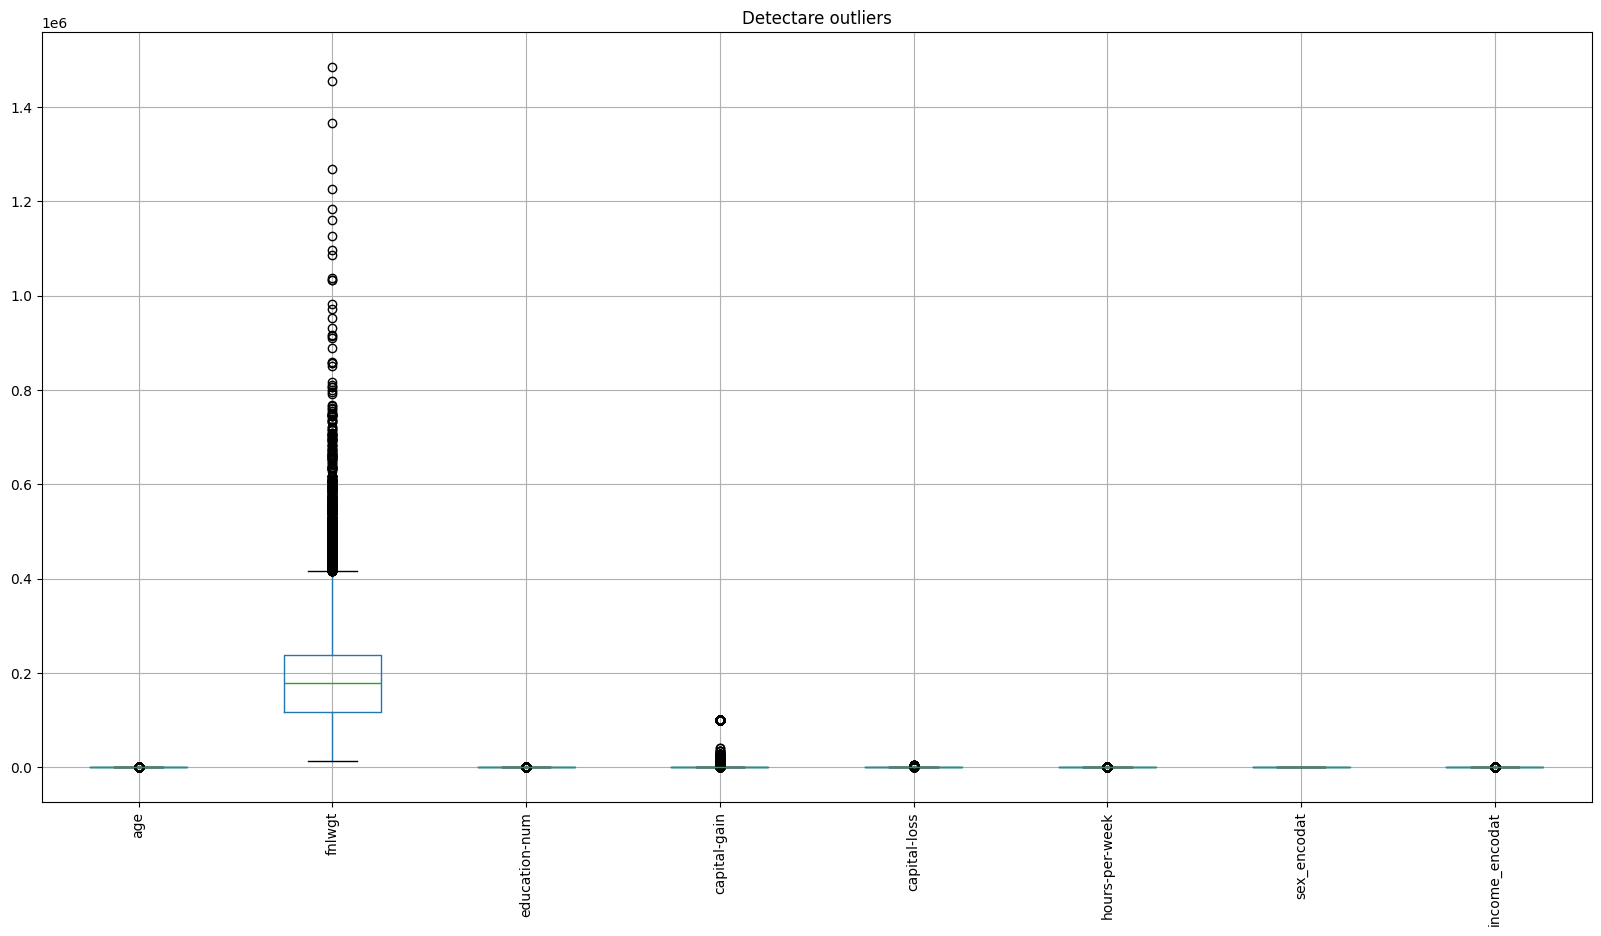

In [174]:
plt.figure(figsize=(20, 10))
data[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Detectare outliers")
plt.show()

#Tratarea outlierilor:

#Au fost identificati multipli outlieri in coloanele setului de date; pentru tratarea lor, voi utiliza metoda winsorization pentru a limita extremele, fara sa elimin atat de multe entries din setul de date. 

In [175]:
Q1 = data['hours-per-week'].quantile(0.25)
Q3 = data['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data['hours-per-week'] = data['hours-per-week'].clip(lower, upper)

#In continuare, se vor defini target-ul si variabilele proiectului:
x = features
y = target-ul regresiei

In [176]:
target = "hours-per-week"
X = data.drop(columns=[target])
y = data[target]

#Drept ultim pas inainte de impartirea train/test, se vor salva datele intr-un fisier CSV separat:

In [177]:
data.to_csv('Cleaned_data_final.csv', index=False)

df = pd.read_csv('Cleaned_data_final.csv')
df.head(10)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,sex_encodat,income_encodat,workclass_Local-gov,workclass_Never-worked,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,age_group_adult,age_group_senior
0,39,77516,13,2174,0,40.0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,13,0,0,32.5,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,9,0,0,40.0,1,0,False,False,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,7,0,0,40.0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40.0,0,0,False,False,...,False,False,False,True,False,True,False,False,False,False
5,37,284582,14,0,0,40.0,0,0,False,False,...,False,False,False,True,False,False,False,True,True,False
6,49,160187,5,0,0,32.5,0,0,False,False,...,False,False,False,False,False,True,False,False,True,False
7,52,209642,9,0,0,45.0,1,1,False,False,...,False,False,False,False,False,False,False,True,True,False
8,31,45781,14,14084,0,50.0,0,1,False,False,...,False,False,False,False,False,False,False,True,True,False
9,42,159449,13,5178,0,40.0,1,1,False,False,...,False,False,False,False,False,False,False,True,True,False


#Cream impartirea train/test:

In [178]:
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train_final.shape, X_test_final.shape)

(26029, 44) (6508, 44)


#Salvam datele in format CSV:

In [179]:
X_train_final.to_csv("X_train.csv", index=False)
X_test_final.to_csv("X_test.csv", index=False)
y_train_final.to_csv("y_train.csv", index=False)
y_test_final.to_csv("y_test.csv", index=False)

#Setul de date Census_Data_Preprocess a fost curatat si preprocesat corespunzator pentru rularea analizelor de regresie ulterioare; noul set de date obtinut a fost salvat separat, iar impartirea train/test a fost salvata de asemenea separat, in format CSV.